In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,classification_report,ConfusionMatrixDisplay, RocCurveDisplay,precision_score,roc_curve
import seaborn as sns
from sklearn.utils import shuffle
# from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/dataset.csv')
df = shuffle(df,random_state=42)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin_rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for col in df.columns:

    df[col] = df[col].str.replace('_',' ')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Acne,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,stomach bleeding,chest pain,chest pain,loss of smell,muscle pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [ ]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


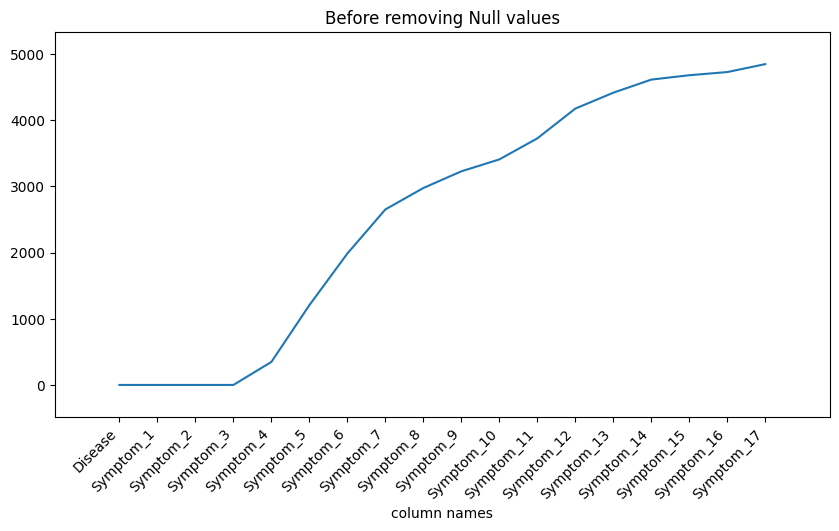

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('Before removing Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

In [ ]:
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,0,0,0,0,0,0
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1 = pd.read_csv('/content/Symptom-severity.csv')
df1['Symptom'] = df1['Symptom'].str.replace('_',' ')
df1.head()

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5


In [ ]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]

d = pd.DataFrame(vals, columns=cols)
d.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,4,3,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0
3,AIDS,3,6,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,5,3,5,4,4,4,0,0,0,0,0,0,0,0,0,0


In [ ]:
d = d.replace('dischromic  patches', 0)
d = d.replace('spotting  urination',0)
df = d.replace('foul smell of urine',0)
df.head(10)

<ipython-input-15-6d5456d11e41>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d = d.replace('dischromic  patches', 0)
<ipython-input-15-6d5456d11e41>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d = d.replace('spotting  urination',0)
<ipython-input-15-6d5456d11e41>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downc

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,4,3,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0
3,AIDS,3,6,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,5,3,5,4,4,4,0,0,0,0,0,0,0,0,0,0
5,Hypertension,3,7,4,4,3,0,0,0,0,0,0,0,0,0,0,0,0
6,Hypoglycemia,5,4,4,3,3,5,5,4,4,4,2,4,0,0,0,0,0
7,Arthritis,2,4,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Hepatitis B,1,4,2,3,4,4,4,4,4,6,5,2,0,0,0,0,0
9,Migraine,3,5,3,5,4,4,3,2,3,0,0,0,0,0,0,0,0


In [ ]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4       0
Symptom_5       0
Symptom_6       0
Symptom_7       0
Symptom_8       0
Symptom_9       0
Symptom_10      0
Symptom_11      0
Symptom_12      0
Symptom_13      0
Symptom_14      0
Symptom_15      0
Symptom_16      0
Symptom_17      0


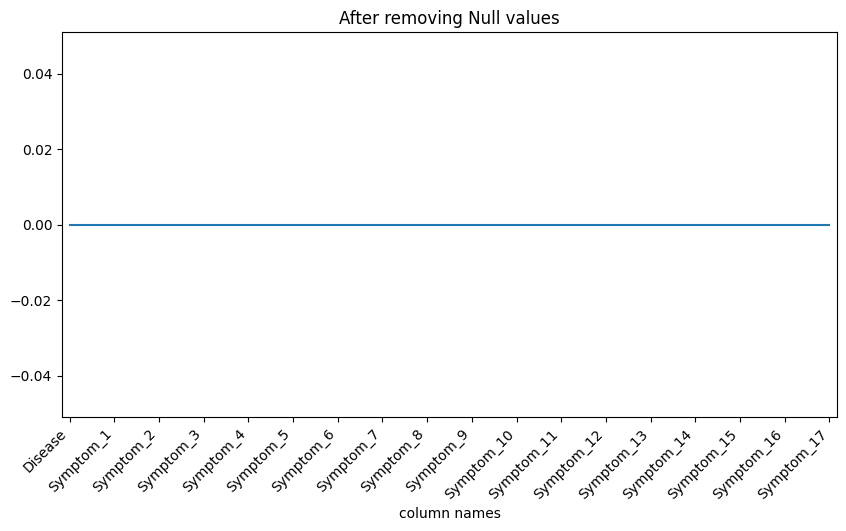

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('After removing Null values')
plt.xlabel('column names')
plt.margins(0.01)
plt.show()

In [ ]:
print("Number of symptoms used to identify the disease ",len(df1['Symptom'].unique()))
print("Number of diseases that can be identified ",len(df['Disease'].unique()))

Number of symptoms used to identify the disease  132
Number of diseases that can be identified  41


In [ ]:
data = df.iloc[:,1:].values
labels = df['Disease'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size = 0.8,random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3936, 17) (984, 17) (3936,) (984,)


In [ ]:
rfc=RandomForestClassifier(random_state=42)

[3 5 3 5 4 4 3 2 3 0 0 0 0 0 0 0 0]
Migraine
F1-score% = 99.58380389536958 | Accuracy% = 99.59349593495935


<Axes: >

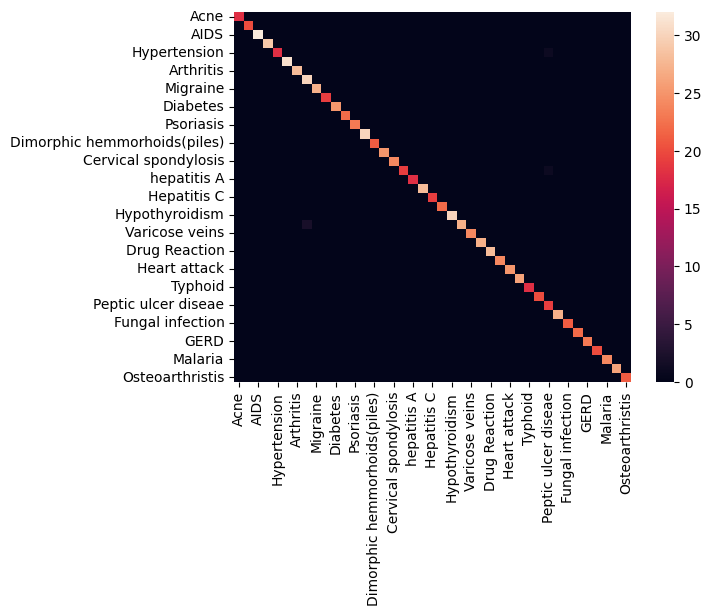

In [ ]:
rnd_forest = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 500, max_depth=13)
rnd_forest.fit(x_train,y_train)
preds=rnd_forest.predict(x_test)
print(x_test[0])
print(preds[0])
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

In [ ]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_train =cross_val_score(rnd_forest, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_train.mean()*100.0, rnd_forest_train.std()*100.0))

Mean Accuracy: 99.187%, Standard Deviation: (0.44%)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Load both datasets
symptom_dataset = pd.read_csv("/content/dataset.csv")  # Replace with the actual file name for Sheet 2

# Drop the last 6 columns from the dataset
symptom_dataset = symptom_dataset.iloc[:, :-6]
description_dataset = pd.read_csv("/content/symptom_Description.csv")  # Replace with the actual file name for Sheet 1
symptom_severity=pd.read_csv("/content/Symptom-severity.csv")
print(symptom_dataset.head())
print(description_dataset.head())
print(symptom_severity.head())

            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11  
0        NaN        NaN 

In [ ]:
# Clean column names and standardize text formatting
symptom_dataset['Disease'] = symptom_dataset['Disease'].str.strip().str.lower()
description_dataset['Disease'] = description_dataset['Disease'].str.strip().str.lower()
symptom_severity['Symptom'] = symptom_severity['Symptom'].str.strip().str.lower()
# Merge the datasets on 'Disease'
merged_dataset = pd.merge(symptom_dataset, description_dataset, on='Disease', how='left')

# Display the merged dataset
print(merged_dataset.head())



# Save the merged dataset to a new CSV file
merged_dataset.to_csv("merged_dataset.csv", index=False)

print("Merged dataset saved as 'merged_dataset.csv'")

            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  fungal infection     itching              skin_rash    dischromic _patches   
4  fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11                           

In [ ]:
# Load the merged dataset
merged_dataset = pd.read_csv("merged_dataset.csv")

# Handling missing values
# Replace NaN values in the symptom columns with 'None' for uniformity
symptom_columns = [col for col in merged_dataset.columns if col.startswith('Symptom_')]
merged_dataset[symptom_columns] = merged_dataset[symptom_columns].fillna('None')

# Removing repeated rows for the same disease
# Create a set of symptoms as a unique identifier for each disease
merged_dataset['Symptom_Set'] = merged_dataset[symptom_columns].apply(lambda row: tuple(sorted(row)), axis=1)

# Drop duplicate diseases based on Disease and Symptom_Set
final_dataset = merged_dataset.drop_duplicates(subset=['Disease', 'Symptom_Set']).drop(columns=['Symptom_Set'])

# Save the final cleaned dataset
final_dataset.to_csv("final_dataset.csv", index=False)

# Display the cleaned dataset
print(final_dataset.head())


# print("Final cleaned dataset saved as 'final_dataset.csv'")


            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  fungal infection     itching              skin_rash    dischromic _patches   
4  fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches      None      None      None      None      None   
1                  None      None      None      None      None      None   
2                  None      None      None      None      None      None   
3                  None      None      None      None      None      None   
4                  None      None      None      None      None      None   

  Symptom_10 Symptom_11                           

In [ ]:
dt=final_dataset
dt.shape

(301, 13)

In [ ]:
import pandas as pd
import re

# Load the dataset
dataset = pd.read_csv("final_dataset.csv")

# # Step 1: Standardize Symptom Names
# # Replace synonyms or typos (add more mappings if needed)
# standardized_symptoms = {
#     "Itching": "itching",
#     "skin rash": "skin_rash",
#     "nodal skin eruptions": "nodal_skin_eruptions",
#     "dischromic _patches": "dischromic_patches"
# }

# def standardize_symptoms(value):
#     if pd.notna(value):
#         value = value.strip().lower()  # Normalize case and whitespace
#         return standardized_symptoms.get(value, value)  # Replace if mapping exists
#     return None

# symptom_columns = [col for col in dataset.columns if "Symptom" in col]
# for col in symptom_columns:
#     dataset[col] = dataset[col].apply(standardize_symptoms)

# Step 1: Standardize and Normalize All Entries in Disease and Symptom Columns
# Function to clean and normalize text
def clean_text(value):
    if pd.notna(value):  # Check if the value is not NaN
        value = value.strip().lower()  # Convert to lowercase and strip whitespace
        value = re.sub(r'[^a-z0-9_]', '_', value)  # Replace special characters with underscores
        return value
    return None

# Normalize the 'Disease' column
dataset['Disease'] = dataset['Disease'].apply(clean_text)

# Normalize all symptom columns
symptom_columns = [col for col in dataset.columns if "Symptom" in col]
for col in symptom_columns:
    dataset[col] = dataset[col].apply(clean_text)

# Step 2: Text Normalization
# Convert text to lowercase and remove special characters
dataset['Disease'] = dataset['Disease'].str.lower().str.replace(r'[^a-z0-9\s]', '', regex=True)

# Step 3: Data Transformation - One-Hot Encoding for Symptoms
# Flatten the symptom columns into a single list
all_symptoms = set()
for col in symptom_columns:
    all_symptoms.update(dataset[col].dropna().unique())

# Create a column for each symptom with binary encoding
for symptom in all_symptoms:
    dataset[symptom] = dataset[symptom_columns].apply(lambda row: int(symptom in row.values), axis=1)

# Drop the original symptom columns
dataset = dataset.drop(columns=symptom_columns)

# Save the transformed dataset
dataset.to_csv("transformed_dataset.csv", index=False)

# Display the first few rows of the transformed dataset


# print("The transformed dataset has been saved as 'transformed_dataset.csv'.")


<ipython-input-7-6fe5865093f3>:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[symptom] = dataset[symptom_columns].apply(lambda row: int(symptom in row.values), axis=1)
<ipython-input-7-6fe5865093f3>:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[symptom] = dataset[symptom_columns].apply(lambda row: int(symptom in row.values), axis=1)
<ipython-input-7-6fe5865093f3>:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

In [ ]:
# print(dataset.head())
df = pd. DataFrame(dataset)
df.head()

,Disease,Description,shivering,foul_smell_of_urine,acute_liver_failure,throat_irritation,muscle_weakness,muscle_pain,weakness_in_limbs,enlarged_thyroid,...,fatigue,back_pain,redness_of_eyes,irritation_in_anus,irritability,hip_joint_pain,family_history,swollen_blood_vessels,breathlessness,dehydration
0,fungalinfection,"In humans, fungal infections occur when an inv...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,fungalinfection,"In humans, fungal infections occur when an inv...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,fungalinfection,"In humans, fungal infections occur when an inv...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,fungalinfection,"In humans, fungal infections occur when an inv...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,fungalinfection,"In humans, fungal infections occur when an inv...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
